<a href="https://colab.research.google.com/github/joshuabusinge/GETIN-APP/blob/master/ML_Class_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read data
df = pd.read_csv('//content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# shuffle the data because data in series
df = df.sample(frac=1)

df.iloc[:10]


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
315,894089,B,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,...,19.71,84.48,544.2,0.11040,0.04953,0.01938,0.02784,0.1917,0.06174,NaN
469,911366,B,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,...,25.40,88.14,528.1,0.17800,0.28780,0.31860,0.14160,0.2660,0.09270,NaN
519,917080,B,12.75,16.70,82.51,493.8,0.11250,0.11170,0.038800,0.029950,...,21.74,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,NaN
353,9010018,M,15.08,25.74,98.00,716.6,0.10240,0.09769,0.123500,0.065530,...,33.22,121.20,1050.0,0.16600,0.23560,0.40290,0.15260,0.2654,0.09438,NaN
141,869104,M,16.11,18.05,105.10,813.0,0.09721,0.11370,0.094470,0.059430,...,25.27,129.00,1233.0,0.13140,0.22360,0.28020,0.12160,0.2792,0.08158,NaN
283,8912280,M,16.24,18.77,108.80,805.1,0.10660,0.18020,0.194800,0.090520,...,25.09,126.90,1031.0,0.13650,0.47060,0.50260,0.17320,0.2770,0.10630,NaN
384,902727,B,13.28,13.72,85.79,541.8,0.08363,0.08575,0.050770,0.028640,...,17.37,96.59,623.7,0.11660,0.26850,0.28660,0.09173,0.2736,0.07320,NaN
295,891923,B,13.77,13.27,88.06,582.7,0.09198,0.06221,0.010630,0.019170,...,16.93,94.17,661.1,0.11700,0.10720,0.03732,0.05802,0.2823,0.06794,NaN
307,89346,B,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,...,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804,NaN


In [4]:
df_breast_cancer = df[['id','diagnosis','Unnamed: 32']]

df_breast_cancer.head()

,id,diagnosis,Unnamed: 32
315,894089,B,NaN
469,911366,B,NaN
519,917080,B,NaN
2,84300903,M,NaN
353,9010018,M,NaN


In [5]:
# drop the unnamed and id columns.
columns= ['Unnamed: 32','id']

df_breast_cancer = df.drop(columns, axis=1)
df_breast_cancer.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
315,B,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,...,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174
469,B,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,...,13.36,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270
519,B,12.75,16.70,82.51,493.8,0.11250,0.11170,0.038800,0.029950,0.2120,...,14.45,21.74,93.63,624.1,0.1475,0.19790,0.14230,0.08045,0.3071,0.08557
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
353,M,15.08,25.74,98.00,716.6,0.10240,0.09769,0.123500,0.065530,0.1647,...,18.51,33.22,121.20,1050.0,0.1660,0.23560,0.40290,0.15260,0.2654,0.09438


In [6]:
# no of rows and columns
df_breast_cancer.shape

(569, 31)

In [7]:
# Checking the data types
df_breast_cancer.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [8]:
#Encoding categorical data values (
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df_breast_cancer.iloc[:,0]= labelencoder_Y.fit_transform(df_breast_cancer.iloc[:,0].values)
print(labelencoder_Y.fit_transform(df_breast_cancer.iloc[:,0].values))

df_breast_cancer.head()

[0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0
 0 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1
 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 0 0 1 0 1 0 1 0 1 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
315,0,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,...,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174
469,0,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,...,13.36,25.40,88.14,528.1,0.1780,0.28780,0.31860,0.14160,0.2660,0.09270
519,0,12.75,16.70,82.51,493.8,0.11250,0.11170,0.038800,0.029950,0.2120,...,14.45,21.74,93.63,624.1,0.1475,0.19790,0.14230,0.08045,0.3071,0.08557
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.42450,0.45040,0.24300,0.3613,0.08758
353,1,15.08,25.74,98.00,716.6,0.10240,0.09769,0.123500,0.065530,0.1647,...,18.51,33.22,121.20,1050.0,0.1660,0.23560,0.40290,0.15260,0.2654,0.09438


In [9]:
# Count class labels
df_breast_cancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Data **visualization**

Number of Benign 357
Malignant count: 212


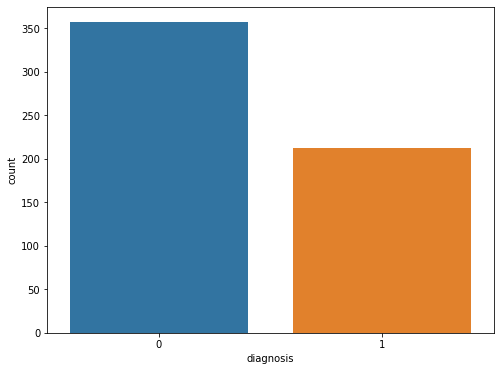

In [10]:
#The labels are the diagnosis column
labels_data = df_breast_cancer['diagnosis']
# Benign and Malignant count
print("Number of Benign {benign_count}\nMalignant count: {malignant_count}" 
.format(benign_count = labels_data.value_counts()[0], malignant_count = labels_data.value_counts()[1]))

plt.figure(figsize=(8,6))
labels_count = sns.countplot(labels_data, label="Count")

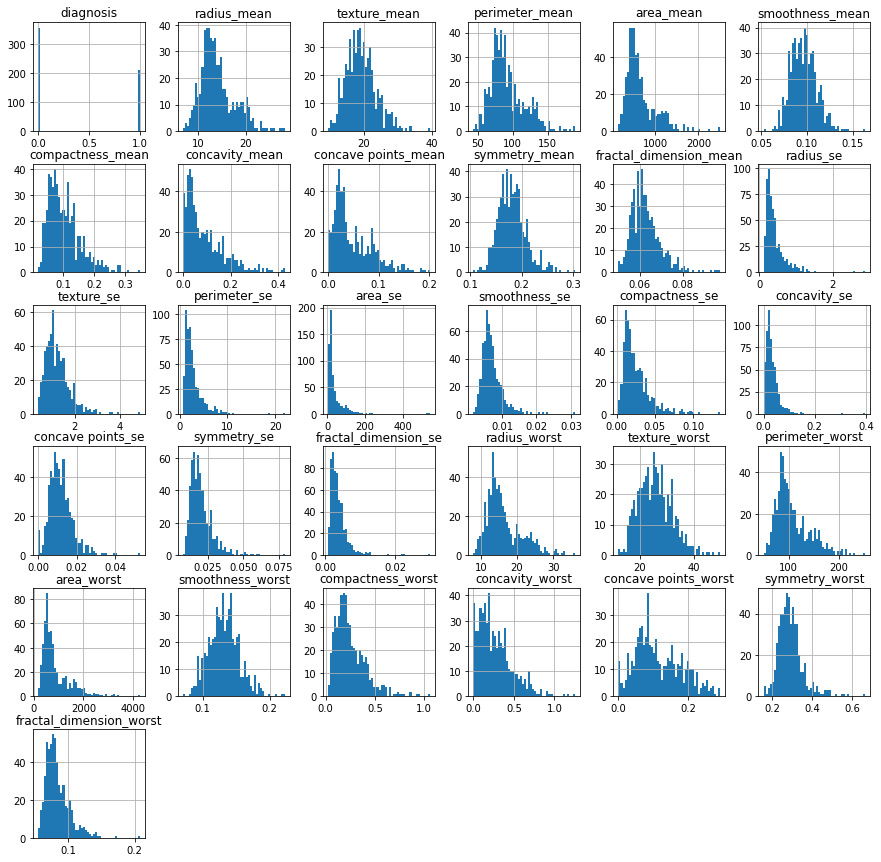

In [11]:
# Data visualization to create histogram
df_breast_cancer.hist(bins=50, figsize=(15, 15))
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Creating an Object of StandardScaler
scaler = MinMaxScaler()

# Fit the dataframe to the scaler
print(scaler.fit(df_breast_cancer))

MinMaxScaler()


In [13]:
# Transform the dataframe
features_scaled = scaler.transform(df_breast_cancer)

# Convertin the scaled array to dataframe
features_scaled = pd.DataFrame(features_scaled, columns=df_breast_cancer.columns)
features_scaled.shape
features_scaled.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.0,0.260732,0.241461,0.244627,0.143415,0.293220,0.058156,0.010480,0.031923,0.078283,...,0.192458,0.204957,0.169680,0.088232,0.259064,0.021577,0.015479,0.095670,0.069387,0.043946
1,0.0,0.219556,0.286439,0.225209,0.112534,0.585628,0.395436,0.238988,0.276541,0.453030,...,0.193170,0.356610,0.187908,0.084275,0.705474,0.252748,0.254473,0.486598,0.215849,0.247016
2,0.0,0.273037,0.236388,0.267570,0.148590,0.540489,0.283173,0.090909,0.148857,0.535354,...,0.231946,0.259062,0.215250,0.107870,0.504061,0.165527,0.113658,0.276460,0.296866,0.200249
3,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
4,1.0,0.383312,0.542103,0.374611,0.243097,0.449309,0.240200,0.289363,0.325696,0.296465,...,0.376379,0.565032,0.352557,0.212544,0.626230,0.202103,0.321805,0.524399,0.214666,0.258035


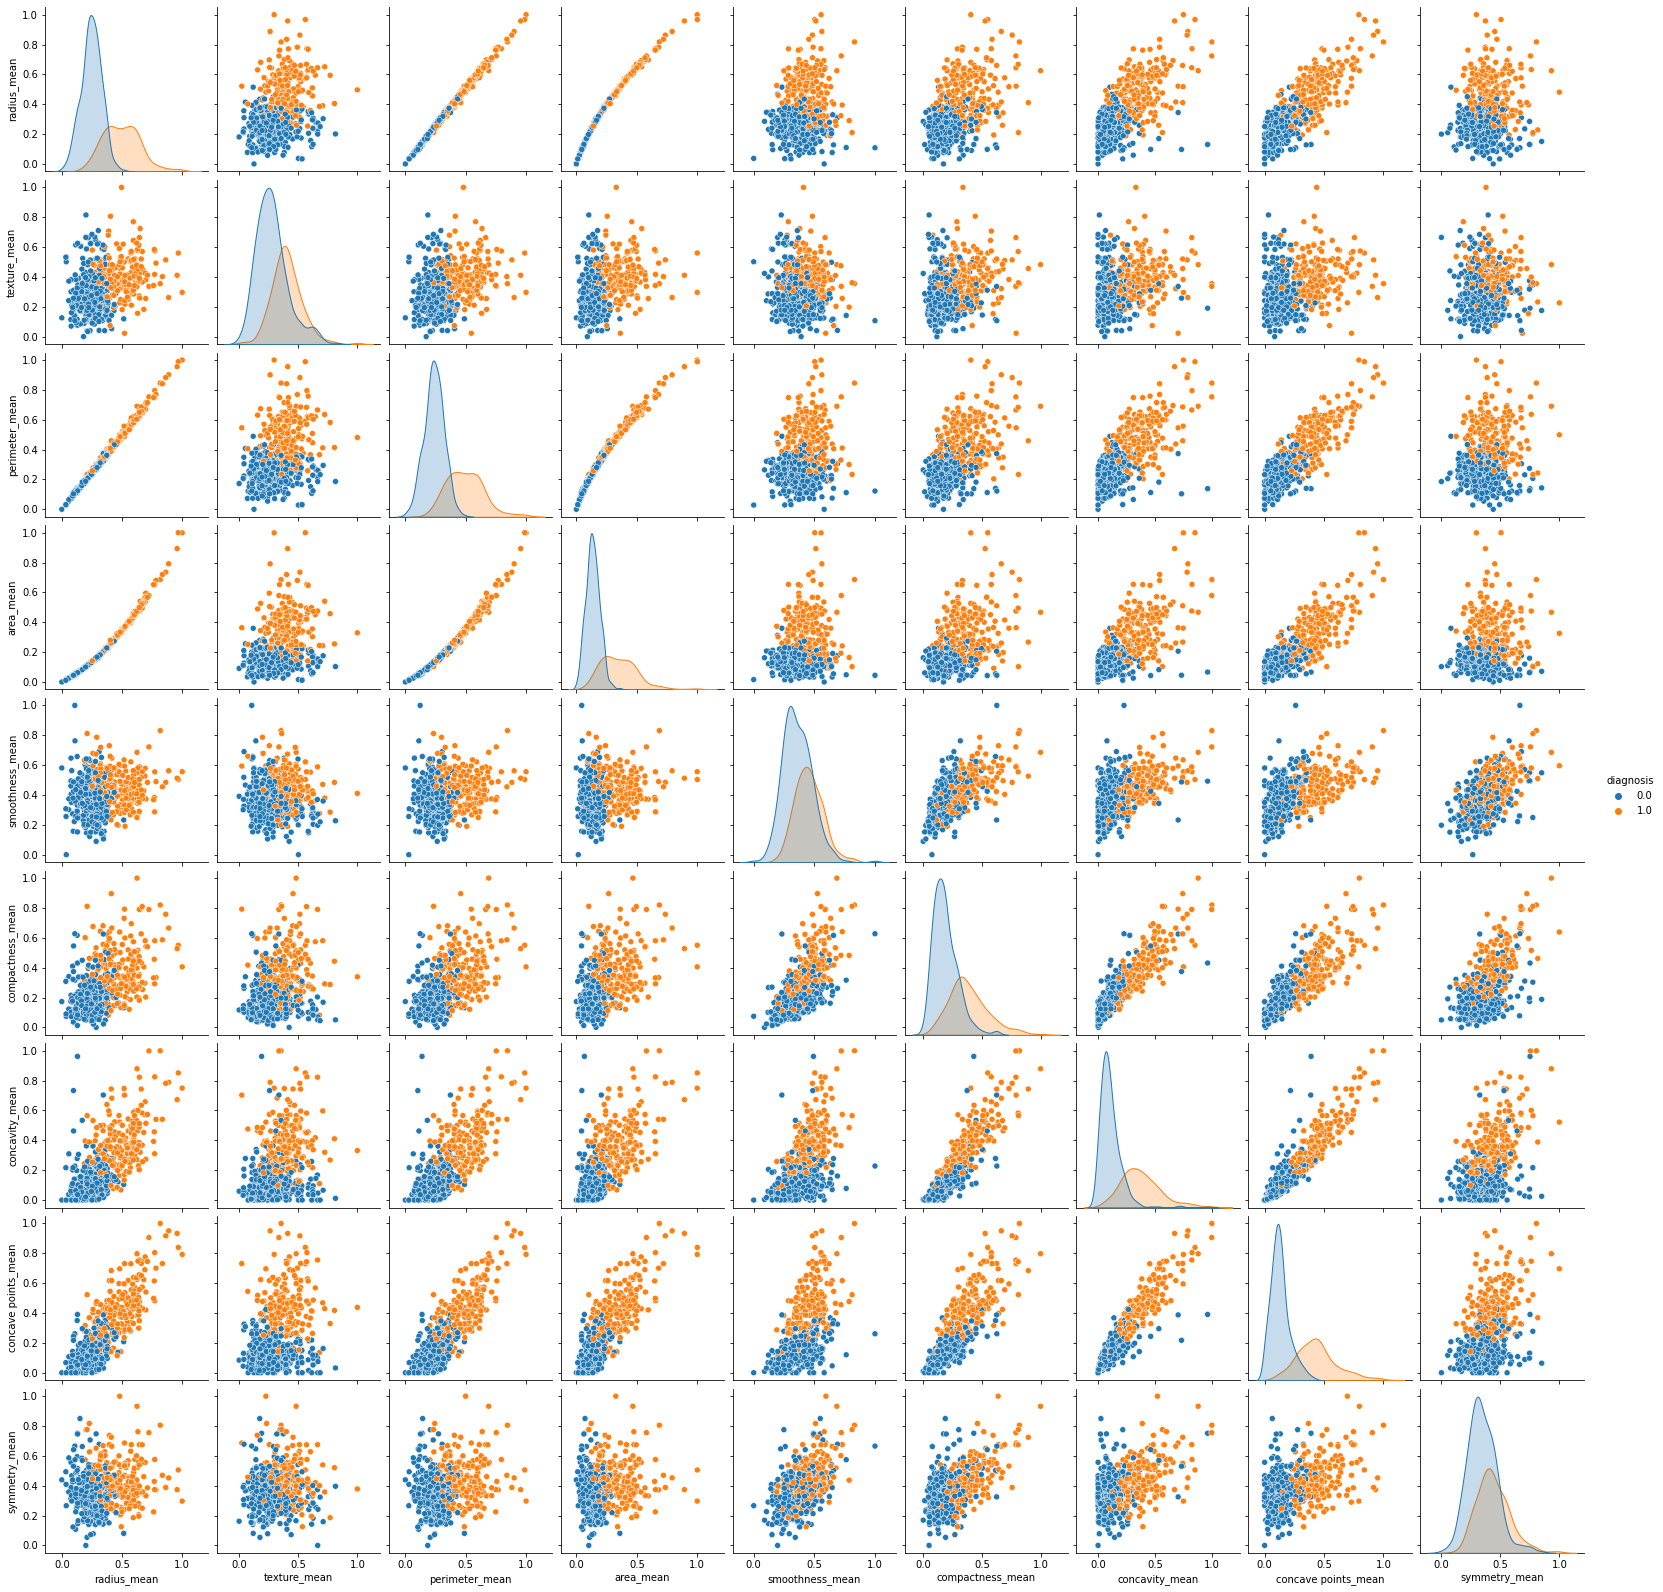

In [14]:
#Create a pair plot, remember that 0 means benign and 1 means malignant
sns.pairplot(features_scaled.iloc[:,0:10], hue = 'diagnosis')

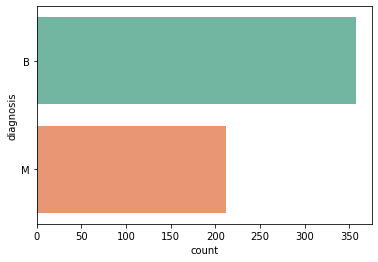

In [15]:
# Count each label
ax = sns.countplot(y='diagnosis', data=df, palette='Set2')

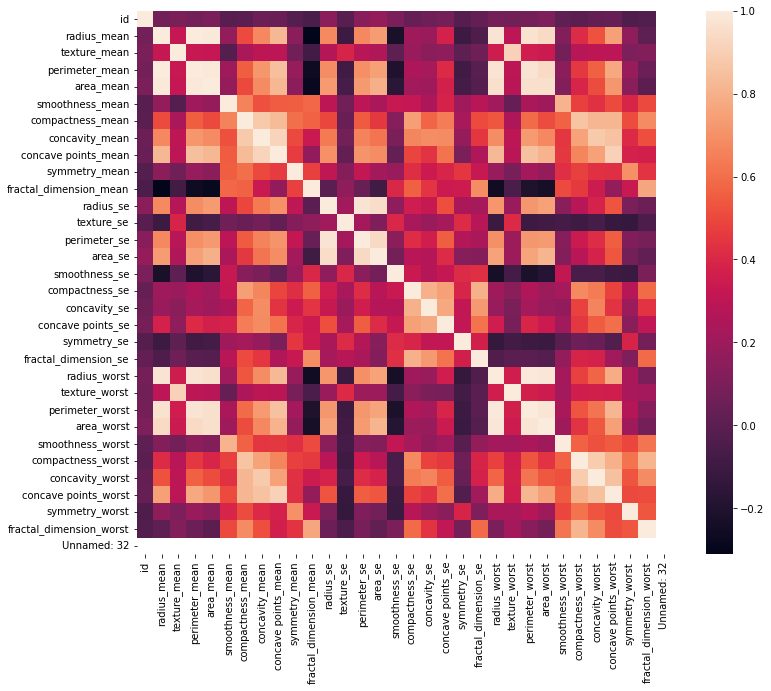

In [16]:
# Finding correlation
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), ax=ax)

diagnosis
0.0    357
1.0    212
dtype: int64


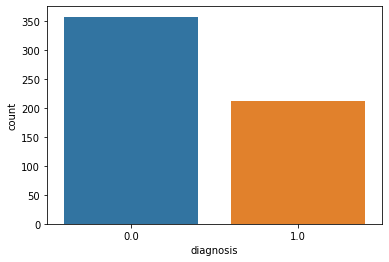

In [17]:
print(features_scaled.groupby('diagnosis').size())
sns.countplot(features_scaled['diagnosis'],label="Count")
plt.show()

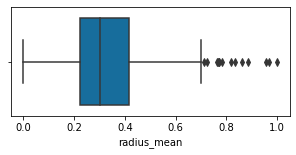

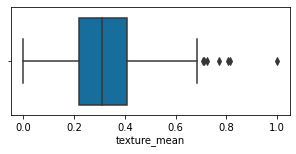

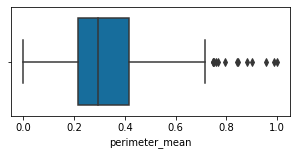

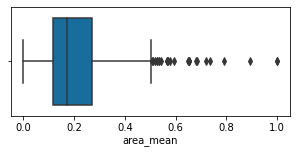

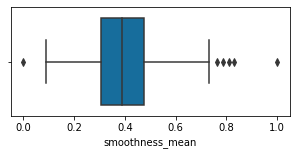

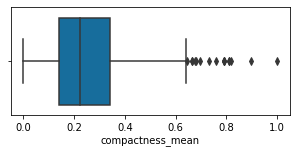

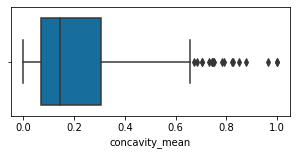

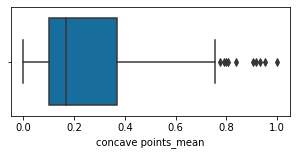

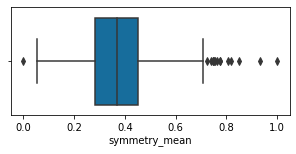

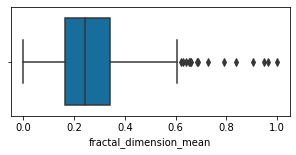

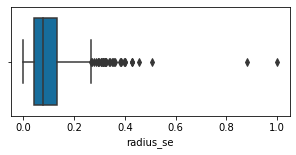

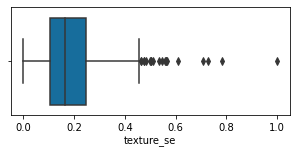

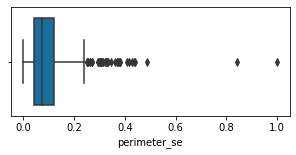

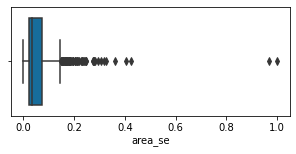

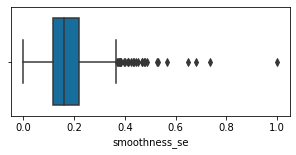

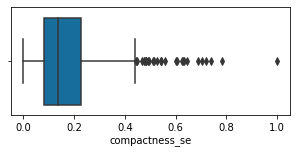

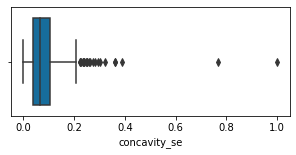

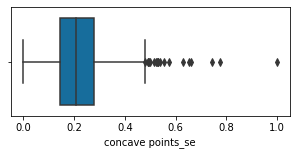

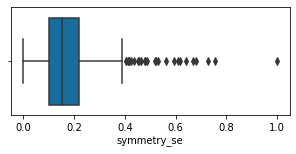

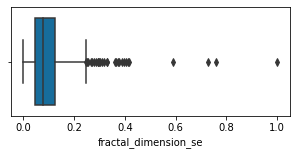

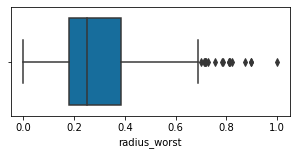

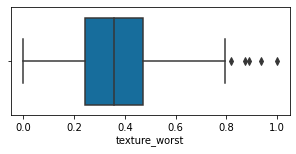

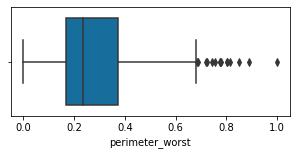

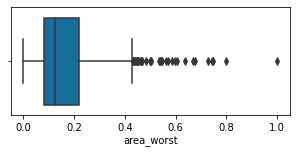

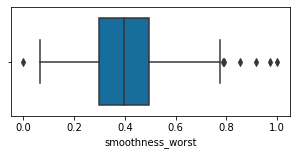

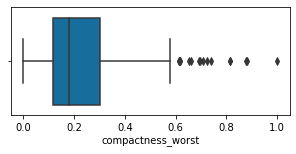

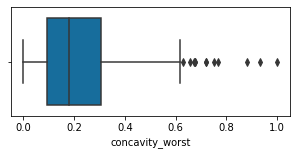

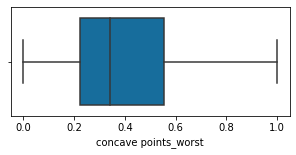

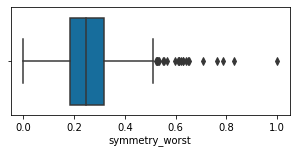

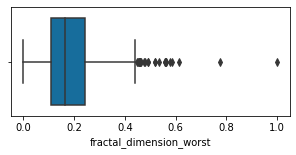

In [18]:
# box plot to check outlier in each category
def boxPlot(dff):
    d = dff.drop(columns=['diagnosis'])
    for column in d:
        plt.figure(figsize=(5, 2))
        sns.boxplot(x=column, data=d, palette="colorblind")

boxPlot(features_scaled)

In [19]:
# Quartile range

Q1 = features_scaled.quantile(0.25)
Q3 = features_scaled.quantile(0.75)
inter_quartile_range = Q3 - Q1


In [21]:
# quartiles and interquartile range

df_out = features_scaled[~((features_scaled < (Q1 - (1.5 * inter_quartile_range))) | (features_scaled > (Q3 + (1.5 * inter_quartile_range)))).any(axis=1)]
features_scaled.shape, df_out.shape

((569, 31), (398, 31))

In [22]:
# Separate labels and features
X = df_out.drop(columns=['diagnosis'])
y = df_out['diagnosis']

In [23]:
# Spilt the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# we used 30% test data
# check the size before beginning
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((278, 30), (120, 30), (278,), (120,))

In [25]:
# cross validation function
def tn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 0]


def fp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[0, 1]


def fn(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 0]


def tp(y_true, y_pred):
    return confusion_matrix(y_true, y_pred)[1, 1]


def acc(y_true, y_pred):
    return accuracy(y_true, y_pred)


In [26]:
# custom accuracy
def accuracy(y_true, y_pred):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    N = sum(map(sum, cnf_matrix))
    tp = cnf_matrix[1, 1]
    tn = cnf_matrix[0, 0]
    return round((tp + tn) / N, 2)

In [27]:
# cross validation purpose
scoring = {'accuracy': make_scorer(metrics.accuracy_score), 'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'acc': make_scorer(acc)}

def print_result(result):
    print("True Positive: ", result['test_tp'])
    print("True Negative: ", result['test_tn'])
    print("False Negative: ", result['test_fn'])
    print("False Positive: ", result['test_fp'])
    print("Accuracy: ", result['test_acc'])

In [28]:
# acc list and rcc list stores the output of each model
acc = []
roc = []

In [29]:
# Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("Naive Bayes : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

Naive Bayes : 
Training Set Accuracy :  0.9280575539568345
Test Set Accuracy 0.9583333333333334 ROC 0.9583333333333335


In [30]:
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [7 8 6 7 6 7 7 7 5 7]
True Negative:  [19 19 18 18 21 20 20 19 18 18]
False Negative:  [1 0 2 1 1 0 0 0 2 0]
False Positive:  [1 1 2 2 0 1 1 2 2 2]
Accuracy:  [0.93 0.96 0.86 0.89 0.96 0.96 0.96 0.93 0.85 0.93]


In [31]:
# Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_train = model.predict(X_train)

In [32]:
# find accuracy
ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
# Code for ROC_AUC curve
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Logistic Regression : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

****************************************************
Logistic Regression : 
Training Set Accuracy :  0.9280575539568345
Test Set Accuracy 0.9833333333333333 ROC 0.9583333333333333


In [33]:
# cross validation shows how accurate our model is
result = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [6 6 3 5 5 6 7 7 5 6]
True Negative:  [20 20 20 20 21 21 21 21 19 20]
False Negative:  [2 2 5 3 2 1 0 0 2 1]
False Positive:  [0 0 0 0 0 0 0 0 1 0]
Accuracy:  [0.93 0.93 0.82 0.89 0.93 0.96 1.   1.   0.89 0.96]


In [34]:
# Support Vector Machine
model = SVC(gamma='auto', kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Support Vector Machine : ")
print("Training Set Accuracy : ", ac_train)
print("Test Set Accuracy {0} ROC {1}".format(ac, rc))

****************************************************
Support Vector Machine : 
Training Set Accuracy :  0.960431654676259
Test Set Accuracy 0.9833333333333333 ROC 0.9583333333333333


In [35]:
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [6 8 5 6 6 6 7 7 5 6]
True Negative:  [20 20 20 20 21 21 21 21 19 20]
False Negative:  [2 0 3 2 1 1 0 0 2 1]
False Positive:  [0 0 0 0 0 0 0 0 1 0]
Accuracy:  [0.93 1.   0.89 0.93 0.96 0.96 1.   1.   0.89 0.96]


In [36]:
# KNN
model = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("K-Nearest Neighbors : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

****************************************************
K-Nearest Neighbors : 
Training Set Accuracy :  0.9568345323741008
Accuracy 1.0 ROC 1.0


In [37]:
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [7 8 6 4 6 7 7 6 6 6]
True Negative:  [20 20 20 20 20 21 21 21 20 19]
False Negative:  [1 0 2 4 1 0 0 1 1 1]
False Positive:  [0 0 0 0 1 0 0 0 0 1]
Accuracy:  [0.96 1.   0.93 0.86 0.93 1.   1.   0.96 0.96 0.93]


In [38]:
# Random Forest
model = RandomForestClassifier(n_estimators=20, max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

ac = accuracy_score(y_test, y_pred)
acc.append(ac)
ac_train = accuracy_score(y_train, y_pred_train)
rc = roc_auc_score(y_test, y_pred)
roc.append(rc)
print("****************************************************")
print("Random Forest : ")
print("Training Set Accuracy : ", ac_train)
print("Accuracy {0} ROC {1}".format(ac, rc))

****************************************************
Random Forest : 
Training Set Accuracy :  1.0
Accuracy 0.9666666666666667 ROC 0.9479166666666666


In [39]:
# cross validation
result = cross_validate(model, X_train, y_train, scoring=scoring, cv=10)
print_result(result)

True Positive:  [7 8 4 6 6 6 6 7 5 6]
True Negative:  [20 20 19 20 21 21 20 19 19 19]
False Negative:  [1 0 4 2 1 1 1 0 2 1]
False Positive:  [0 0 1 0 0 0 1 2 1 1]
Accuracy:  [0.96 1.   0.82 0.93 0.96 0.96 0.93 0.93 0.89 0.93]


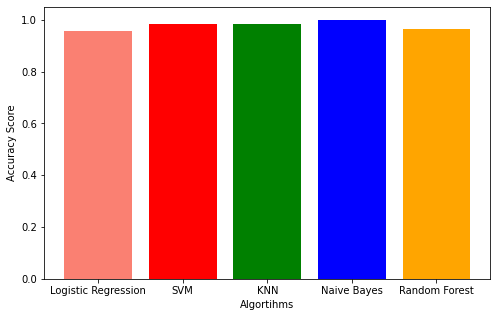

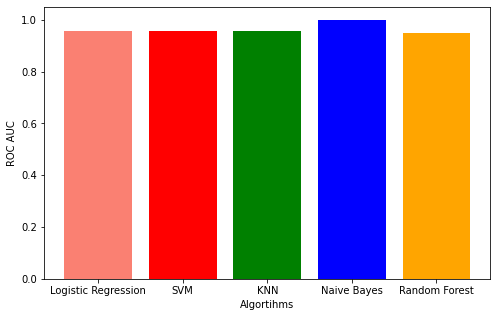

In [40]:
# Plot the bar graph for accuracy and  roc-auc

# accuracy score
plt.figure(figsize=(8, 5))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], acc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Algortihms')

# roc-auc
plt.figure(figsize=(8, 5))
plt.bar(['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes', 'Random Forest'], roc,
        color=['salmon', 'r', 'g', 'b', 'orange'], label='ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Algortihms')
plt.show()